In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [4]:
df = pd.read_csv('covidDataCleaned.csv')
df = pd.read_csv('CountyLevelDataCovid.csv')
df
for row in df:
    print(row)

County
Household 65+
Average Household Size
Median Housing Costs
Income
Percent Overcrowded
Percent Below Poverty Level
Percent Less Than High School Education
Percent Non White
Unemployment Rate 2019
Peak Covid Death Rates per 100,000
Peak Covid Case Rates per 100,000
Covid Case Rates per 100,000
Covid Death Rates per 100,000
Urban Percent
Rural Percent
State
Unemployment Rate 2020
Labor Force
Mortality Rate Per 100,000
Population
Projected Deaths From Unemployment
retail_and_recreation_percent_change_from_baseline
grocery_and_pharmacy_percent_change_from_baseline
parks_percent_change_from_baseline
transit_stations_percent_change_from_baseline
workplaces_percent_change_from_baseline
residential_percent_change_from_baseline


Unnamed: 0
zcta
Percent Over 65
Percent Non White
Household Size
Household 65+
Income
Covid Infection Rate
Covid Death Rate
Overcrowding
Eviction Rates
Population
Unemployment Rate 2019
Percent Commuting
Percent Worked From Home
Occupation: Management
Occupation: Service
Occupation: Sales
Occupation: Construction
Occupation: Transportation
Health Insurance Coverage
Percent Below Poverty
County
Unemployment 2020 (Projected)
[ 154.01657679   43.42649785   48.66628054 -105.17813476  -40.80022749
   15.54255952]


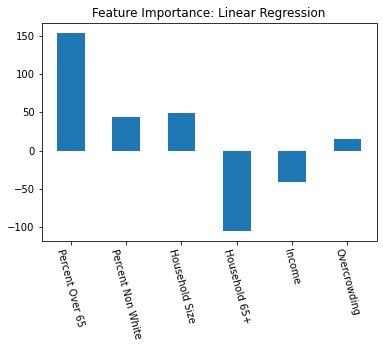

In [9]:
for row in df:
    print(row)
    
from sklearn.linear_model import LinearRegression as lr
from sklearn.tree import DecisionTreeRegressor as tree


from sklearn.preprocessing import StandardScaler as ss

inputData = ['Percent Over 65','Percent Non White',
'Household Size',
'Household 65+',
'Income',
'Overcrowding']

x_train = []
for d in inputData:
    x_train.append(df[d].values)
x_train = np.array(x_train).T

scale = ss()
scale.fit(x_train)
x_train2 = scale.transform(x_train)

households = df['Overcrowding'].values
coviddeaths = df['Covid Death Rate'].values

l = lr()

l.fit(x_train2,coviddeaths)


print(l.coef_)

plt.figure()
plt.title('Feature Importance: Linear Regression')
plt.bar(inputData,l.coef_, width=0.5)
plt.xticks(range(len(inputData)), inputData, rotation=360-75)
# plt.savefig('FeatImpDecTree.pdf',bbox_inches = "tight")
plt.show()


# xvals = np.linspace(min(households),max(households),100)
# yvals = l.coef_[0]*xvals + l.intercept_ 


# plt.figure()
# plt.scatter(households,coviddeaths)
# plt.xlabel('Percent Overcrowded')
# plt.ylabel('Covid Deaths \n per 100000')
# plt.plot(xvals,yvals, color='darkblue')
# plt.savefig('OvercrowdingVsCovid.pdf')
# plt.show()

# zcta = df['zcta'].values

# crowding = []

# for z in zcta:
#     crowding.append(zipmap[z])

# df['Overcrowding']= np.array(crowding)

# print(df.head())

# df.to_csv('covidDataCleaned.csv',index = False)

In [4]:
overcrowdingdf = pd.read_csv('ACSDT5Y2019.B25014_data_with_overlays_2020-12-20T194447.csv')
metadatadf = pd.read_csv('ACSDT5Y2019.B25014_metadata_2020-12-20T194447.csv')

In [5]:
print(metadatadf)
total_pops = overcrowdingdf['B25014_001E'].values[1:].astype(float) + overcrowdingdf['B25014_008E'].values[1:].astype(float)
overcrowded = overcrowdingdf['B25014_005E'].values[1:].astype(float) + overcrowdingdf['B25014_006E'].values[1:].astype(float) + overcrowdingdf['B25014_007E'].values[1:].astype(float)
overcrowded += overcrowdingdf['B25014_011E'].values[1:].astype(float)
overcrowded += overcrowdingdf['B25014_012E'].values[1:].astype(float)
overcrowded += overcrowdingdf['B25014_013E'].values[1:].astype(float)


for i in range(len(overcrowded)):
    if total_pops[i]>0:
    
        overcrowded[i]/= total_pops[i]
    else:
        overcrowded[i] = 0

zips = overcrowdingdf['NAME'].values[1:]

for i in range(len(zips)):
    zipval = zips[i]
    zipval = int(zipval.split(' ')[1])
    zips[i] = zipval


zipmap = dict(zip(zips,overcrowded))
print(zipmap)

         GEO_ID                                                 id
0          NAME                               Geographic Area Name
1   B25014_001E                                   Estimate!!Total:
2   B25014_001M                            Margin of Error!!Total:
3   B25014_002E                  Estimate!!Total:!!Owner occupied:
4   B25014_002M           Margin of Error!!Total:!!Owner occupied:
5   B25014_003E  Estimate!!Total:!!Owner occupied:!!0.50 or les...
6   B25014_003M  Margin of Error!!Total:!!Owner occupied:!!0.50...
7   B25014_004E  Estimate!!Total:!!Owner occupied:!!0.51 to 1.0...
8   B25014_004M  Margin of Error!!Total:!!Owner occupied:!!0.51...
9   B25014_005E  Estimate!!Total:!!Owner occupied:!!1.01 to 1.5...
10  B25014_005M  Margin of Error!!Total:!!Owner occupied:!!1.01...
11  B25014_006E  Estimate!!Total:!!Owner occupied:!!1.51 to 2.0...
12  B25014_006M  Margin of Error!!Total:!!Owner occupied:!!1.51...
13  B25014_007E  Estimate!!Total:!!Owner occupied:!!2.01 or mo

In [6]:
from sklearn.linear_model import LinearRegression as lr
from sklearn.tree import DecisionTreeRegressor as tree


from sklearn.preprocessing import StandardScaler as ss

dfhome = pd.read_csv('average_percent_of_people_staying_at_home_per_day_combined (1).csv')
dfdeaths = pd.read_csv('JHUDataDeaths.csv')
dfdeaths = dfdeaths[dfdeaths['Population']>200000]
dfdeaths = dfdeaths[dfdeaths['4/20/20']>100]
dfdeaths = dfdeaths[dfdeaths['4/20/20']<170]

counties = dfdeaths['Admin2'].values
percent_at_home = []
for c in counties:
    
    newdf = dfhome[dfhome['county_name']== c]
    stayhome = newdf['202005'].values[0]
    percent_at_home.append(stayhome)

counties_at_home = dict(zip(counties,percent_at_home))

counties_below_20 =[]
counties_between_20_25 = []
counties_between_25_30 = []
counties_above_30 = []

for k in list(counties_at_home.keys()):
    if counties_at_home[k] <20:
        counties_below_20.append(k)
    elif counties_at_home[k] <25:
        counties_between_20_25.append(k)
    elif counties_at_home[k] <30:
        counties_between_25_30.append(k)
    else:
        counties_above_30.append(k)
        
#these give a decent result:
# mindate = 120
# maxdate = 160
# preddate = 170
# (100, 135, 225)
# (110, 125, 155)
# (80,95,110)
mindate = 70
maxdate = 100
preddate = 105



below_20_data = []
below_20_predict = []
for c in counties_below_20:
    dfdeathsnew = dfdeaths[dfdeaths['Admin2']==c]
    
    
    vals = dfdeathsnew.iloc[0,mindate:maxdate].values - dfdeathsnew.iloc[0,:].values[mindate-1]
    
    
    
    
    population = float(dfdeathsnew['Population'].values[0])
    val = dfdeathsnew.iloc[0,:].values[preddate]- dfdeathsnew.iloc[0,:].values[mindate-1]
    val/=population
    vals/=population
    val*=600000
    vals*=600000
    
    
    below_20_data.append(vals)
    
    
    below_20_predict.append(val)
below_20_predict = np.array(below_20_predict)  
    
below_20_data = np.array(below_20_data)

between_20_25_data = []
between_20_25_predict = []
for c in counties_between_20_25:
    dfdeathsnew = dfdeaths[dfdeaths['Admin2']==c]
    vals = dfdeathsnew.iloc[0,mindate:maxdate].values - dfdeathsnew.iloc[0,:].values[mindate-1]
    
    val = dfdeathsnew.iloc[0,:].values[preddate]- dfdeathsnew.iloc[0,:].values[mindate-1]
    population = float(dfdeathsnew['Population'].values[0])
    val/=population
    vals/=population
    val*=600000
    vals*=600000
    
    between_20_25_data.append(vals)
    
    
    between_20_25_predict.append(val)
    
between_20_25_predict = np.array(between_20_25_predict)
    
between_20_25_data = np.array(between_20_25_data)

between_25_30_data = []
between_25_30_predict = []
for c in counties_between_25_30:
    dfdeathsnew = dfdeaths[dfdeaths['Admin2']==c]
    vals = dfdeathsnew.iloc[0,mindate:maxdate].values- dfdeathsnew.iloc[0,:].values[mindate-1]
    
    val = dfdeathsnew.iloc[0,:].values[preddate] - dfdeathsnew.iloc[0,:].values[mindate-1]
    population = float(dfdeathsnew['Population'].values[0])
    val/=population
    vals/=population
    val*=600000
    vals*=600000
    
    between_25_30_data.append(vals)
    
    
    
    between_25_30_predict.append(val)
between_25_30_data = np.array(between_25_30_data)
between_25_30_predict = np.array(between_25_30_predict)

above_30_predict = []
above_30_data = []
for c in counties_above_30:
    dfdeathsnew = dfdeaths[dfdeaths['Admin2']==c]
    vals = dfdeathsnew.iloc[0,mindate:maxdate].values- dfdeathsnew.iloc[0,:].values[mindate-1]
    
    val = dfdeathsnew.iloc[0,:].values[preddate] - dfdeathsnew.iloc[0,:].values[mindate-1]
    population = float(dfdeathsnew['Population'].values[0])
    val/=population
    vals/=population
    val*=600000
    vals*=600000
    above_30_data.append(vals)
    
    
    
    above_30_predict.append(val)
above_30_data = np.array(above_30_data)
above_30_predict = np.array(above_30_predict)





In [7]:
import numpy as np
def returnWeights(X,y,lam=.01):
    X = X.astype(float)
    y = y.astype(float)
    try:
        alpha = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))
    except:
        alpha = np.linalg.inv(X.T.dot(X)+lam*np.eye(X.shape[1])).dot(X.T.dot(y))
    return alpha

data_to_plot = []

for c in list(counties_at_home.keys()):
    dfdeathsnew = dfdeaths[dfdeaths['Admin2']==c]
    
#     print(dfdeathsnew)
    population = dfdeathsnew['Population'].values[0]
    val = dfdeathsnew.iloc[0,:].values[preddate]/population
    val*=100000
    at_home_perc = counties_at_home[c]
    data_to_plot.append([at_home_perc,val])
    
# data_to_plot = np.array(data_to_plot)
# plt.figure()
# plt.scatter(data_to_plot[:,0],data_to_plot[:,1])
# plt.show()
# assert False

for i in range(len(below_20_data)):
    
    y_train = below_20_data[i,:]
    
    alpha1 = returnWeights(between_20_25_data.T,y_train)
    alpha2 = returnWeights(between_25_30_data.T,y_train)
    alpha3 = returnWeights(above_30_data.T,y_train)
    
    val1 = alpha1.dot(between_20_25_predict)
    at_home_perc1 = 22.5+ 4*(np.random.rand()-.5)
    val2 = alpha2.dot(between_25_30_predict)
    at_home_perc2 = 27.5+ 4*(np.random.rand()-.5)
    val3 = alpha3.dot(above_30_predict)
    at_home_perc3 = 35+ 4*(np.random.rand()-.5)
    
    data_to_plot.append([at_home_perc1,val1])
    data_to_plot.append([at_home_perc2,val2])
    data_to_plot.append([at_home_perc3,val3])
    
for i in range(len(between_20_25_data)):
    
    y_train = between_20_25_data[i,:]
    
    alpha1 = returnWeights(below_20_data.T,y_train)
    alpha2 = returnWeights(between_25_30_data.T,y_train)
    alpha3 = returnWeights(above_30_data.T,y_train)
    
    val1 = alpha1.dot(below_20_predict)
    at_home_perc1 = 17+ 4*(np.random.rand()-.5)
    val2 = alpha2.dot(between_25_30_predict)
    at_home_perc2 = 27.5+ 4*(np.random.rand()-.5)
    val3 = alpha3.dot(above_30_predict)
    at_home_perc3 = 35+ 4*(np.random.rand()-.5)
    
    data_to_plot.append([at_home_perc1,val1])
    data_to_plot.append([at_home_perc2,val2])
    data_to_plot.append([at_home_perc3,val3])
    
for i in range(len(between_25_30_data)):
    
    y_train = between_25_30_data[i,:]
    
    alpha1 = returnWeights(below_20_data.T,y_train)
    alpha2 = returnWeights(between_20_25_data.T,y_train)
    alpha3 = returnWeights(above_30_data.T,y_train)
    
    val1 = alpha1.dot(below_20_predict)
    at_home_perc1 = 17+ 4*(np.random.rand()-.5)
    val2 = alpha2.dot(between_20_25_predict)
    at_home_perc2 = 22.5+ 4*(np.random.rand()-.5)
    val3 = alpha3.dot(above_30_predict)
    at_home_perc3 = 35+ 4*(np.random.rand()-.5)
    
    data_to_plot.append([at_home_perc1,val1])
    data_to_plot.append([at_home_perc2,val2])
    data_to_plot.append([at_home_perc3,val3])

for i in range(len(above_30_data)):
    
    y_train = above_30_data[i,:]
    
    alpha1 = returnWeights(below_20_data.T,y_train)
    alpha2 = returnWeights(between_20_25_data.T,y_train)
    alpha3 = returnWeights(between_25_30_data.T,y_train)
    
    val1 = alpha1.dot(below_20_predict)
    at_home_perc1 = 17+ 4*(np.random.rand()-.5)
    val2 = alpha2.dot(between_20_25_predict)
    at_home_perc2 = 22.5+ 4*(np.random.rand()-.5)
    val3 = alpha3.dot(between_25_30_predict)
    at_home_perc3 = 27.5+ 4*(np.random.rand()-.5)
    
    data_to_plot.append([at_home_perc1,val1])
    data_to_plot.append([at_home_perc2,val2])
    data_to_plot.append([at_home_perc3,val3])





# alpha = returnWeights(above_30_data.T,below_20_data[0,:])
# #so what is this first rows value predicted to be:
# pred_val = alpha.dot(above_30_predict)

# real_val = below_20_predict[0]

# print(pred_val)
# print(real_val)

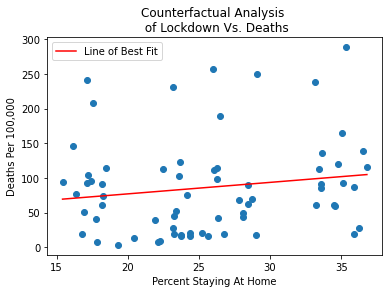

In [8]:
data_to_plot = np.array(data_to_plot)

l = lr()

l.fit(data_to_plot[:,0].reshape(-1,1),data_to_plot[:,1])
intercept = l.intercept_

xvals = np.linspace(min(data_to_plot[:,0]),max(data_to_plot[:,0]))
yvals = xvals*l.coef_+l.intercept_


plt.figure()
plt.scatter(data_to_plot[:,0],data_to_plot[:,1])
plt.plot(xvals,yvals,c='red', label ='Line of Best Fit')
plt.legend()
plt.ylabel('Deaths Per 100,000')
plt.title('Counterfactual Analysis \n of Lockdown Vs. Deaths')
plt.xlabel('Percent Staying At Home')
# plt.savefig('counterfactualFlora.pdf', bbox_inches ='tight')
plt.show()



In [15]:
def lineslopefunc(mindate,maxdate,preddate, plot = False):


    below_20_data = []
    below_20_predict = []
    for c in counties_below_20:
        dfdeathsnew = dfdeaths[dfdeaths['Admin2']==c]


        vals = dfdeathsnew.iloc[0,mindate:maxdate].values - dfdeathsnew.iloc[0,:].values[mindate-1]




        population = float(dfdeathsnew['Population'].values[0])
        val = dfdeathsnew.iloc[0,:].values[preddate]- dfdeathsnew.iloc[0,:].values[mindate-1]
        val/=population
        vals/=population
        val*=600000
        vals*=600000


        below_20_data.append(vals)


        below_20_predict.append(val)
    below_20_predict = np.array(below_20_predict)  

    below_20_data = np.array(below_20_data)

    between_20_25_data = []
    between_20_25_predict = []
    for c in counties_between_20_25:
        dfdeathsnew = dfdeaths[dfdeaths['Admin2']==c]
        vals = dfdeathsnew.iloc[0,mindate:maxdate].values - dfdeathsnew.iloc[0,:].values[mindate-1]

        val = dfdeathsnew.iloc[0,:].values[preddate]- dfdeathsnew.iloc[0,:].values[mindate-1]
        population = float(dfdeathsnew['Population'].values[0])
        val/=population
        vals/=population
        val*=600000
        vals*=600000

        between_20_25_data.append(vals)


        between_20_25_predict.append(val)

    between_20_25_predict = np.array(between_20_25_predict)

    between_20_25_data = np.array(between_20_25_data)

    between_25_30_data = []
    between_25_30_predict = []
    for c in counties_between_25_30:
        dfdeathsnew = dfdeaths[dfdeaths['Admin2']==c]
        vals = dfdeathsnew.iloc[0,mindate:maxdate].values- dfdeathsnew.iloc[0,:].values[mindate-1]

        val = dfdeathsnew.iloc[0,:].values[preddate] - dfdeathsnew.iloc[0,:].values[mindate-1]
        population = float(dfdeathsnew['Population'].values[0])
        val/=population
        vals/=population
        val*=600000
        vals*=600000

        between_25_30_data.append(vals)



        between_25_30_predict.append(val)
    between_25_30_data = np.array(between_25_30_data)
    between_25_30_predict = np.array(between_25_30_predict)

    above_30_predict = []
    above_30_data = []
    for c in counties_above_30:
        dfdeathsnew = dfdeaths[dfdeaths['Admin2']==c]
        vals = dfdeathsnew.iloc[0,mindate:maxdate].values- dfdeathsnew.iloc[0,:].values[mindate-1]

        val = dfdeathsnew.iloc[0,:].values[preddate] - dfdeathsnew.iloc[0,:].values[mindate-1]
        population = float(dfdeathsnew['Population'].values[0])
        val/=population
        vals/=population
        val*=600000
        vals*=600000
        above_30_data.append(vals)



        above_30_predict.append(val)
    above_30_data = np.array(above_30_data)
    above_30_predict = np.array(above_30_predict)


    data_to_plot = []

    for c in list(counties_at_home.keys()):
        dfdeathsnew = dfdeaths[dfdeaths['Admin2']==c]

    #     print(dfdeathsnew)
        population = dfdeathsnew['Population'].values[0]
        val = dfdeathsnew.iloc[0,:].values[preddate]/population
        val*=100000
        at_home_perc = counties_at_home[c]
        data_to_plot.append([at_home_perc,val])

    # data_to_plot = np.array(data_to_plot)
    # plt.figure()
    # plt.scatter(data_to_plot[:,0],data_to_plot[:,1])
    # plt.show()
    # assert False

    for i in range(len(below_20_data)):

        y_train = below_20_data[i,:]

        alpha1 = returnWeights(between_20_25_data.T,y_train)
        alpha2 = returnWeights(between_25_30_data.T,y_train)
        alpha3 = returnWeights(above_30_data.T,y_train)

        val1 = alpha1.dot(between_20_25_predict)
        at_home_perc1 = 22.5+ 5*(np.random.rand()-.5)
        val2 = alpha2.dot(between_25_30_predict)
        at_home_perc2 = 27.5+ 5*(np.random.rand()-.5)
        val3 = alpha3.dot(above_30_predict)
        at_home_perc3 = 35+ 7*(np.random.rand()-.5)

        data_to_plot.append([at_home_perc1,val1])
        data_to_plot.append([at_home_perc2,val2])
        data_to_plot.append([at_home_perc3,val3])

    for i in range(len(between_20_25_data)):

        y_train = between_20_25_data[i,:]

        alpha1 = returnWeights(below_20_data.T,y_train)
        alpha2 = returnWeights(between_25_30_data.T,y_train)
        alpha3 = returnWeights(above_30_data.T,y_train)

        val1 = alpha1.dot(below_20_predict)
        at_home_perc1 = 17+ 5*(np.random.rand()-.5)
        val2 = alpha2.dot(between_25_30_predict)
        at_home_perc2 = 27.5+ 5*(np.random.rand()-.5)
        val3 = alpha3.dot(above_30_predict)
        at_home_perc3 = 35+ 7*(np.random.rand()-.5)

        data_to_plot.append([at_home_perc1,val1])
        data_to_plot.append([at_home_perc2,val2])
        data_to_plot.append([at_home_perc3,val3])

    for i in range(len(between_25_30_data)):

        y_train = between_25_30_data[i,:]

        alpha1 = returnWeights(below_20_data.T,y_train)
        alpha2 = returnWeights(between_20_25_data.T,y_train)
        alpha3 = returnWeights(above_30_data.T,y_train)

        val1 = alpha1.dot(below_20_predict)
        at_home_perc1 = 17+ 5*(np.random.rand()-.5)
        val2 = alpha2.dot(between_20_25_predict)
        at_home_perc2 = 22.5+ 5*(np.random.rand()-.5)
        val3 = alpha3.dot(above_30_predict)
        at_home_perc3 = 35+ 7*(np.random.rand()-.5)

        data_to_plot.append([at_home_perc1,val1])
        data_to_plot.append([at_home_perc2,val2])
        data_to_plot.append([at_home_perc3,val3])

    for i in range(len(above_30_data)):

        y_train = above_30_data[i,:]

        alpha1 = returnWeights(below_20_data.T,y_train)
        alpha2 = returnWeights(between_20_25_data.T,y_train)
        alpha3 = returnWeights(between_25_30_data.T,y_train)

        val1 = alpha1.dot(below_20_predict)
        at_home_perc1 = 17+ 5*(np.random.rand()-.5)
        val2 = alpha2.dot(between_20_25_predict)
        at_home_perc2 = 22.5+ 5*(np.random.rand()-.5)
        val3 = alpha3.dot(between_25_30_predict)
        at_home_perc3 = 27.5+ 5*(np.random.rand()-.5)

        data_to_plot.append([at_home_perc1,val1])
        data_to_plot.append([at_home_perc2,val2])
        data_to_plot.append([at_home_perc3,val3])

    data_to_plot = np.array(data_to_plot)

    l = lr()

    l.fit(data_to_plot[:,0].reshape(-1,1),data_to_plot[:,1])
    coef = l.coef_
    
    if plot:
        xvals = np.linspace(min(data_to_plot[:,0]),max(data_to_plot[:,0]))
        yvals = xvals*l.coef_+l.intercept_


        plt.figure()
        plt.scatter(data_to_plot[:,0],data_to_plot[:,1])
        plt.plot(xvals,yvals,c='red', label ='Line of Best Fit')
        plt.legend()
        plt.ylabel('Deaths Per 100,000')
        plt.title('Counterfactual Analysis \n of Lockdown Vs. Deaths')
        plt.xlabel('Percent Staying At Home')
        plt.savefig('counterfactualFlora.pdf', bbox_inches ='tight')
        plt.show()
        
    
    return data_to_plot,l,coef



In [20]:
# from tqdm import tqdm

# vals = []
# minvals = np.arange(40,120,5)
# maxvals = np.arange(50,160,5)
# predvals = np.arange(60,190,10)

# for ii in tqdm(minvals):
#     for jj in maxvals:
#         for kk in predvals:
#             if ii+10 < jj and jj+5 < kk:
                
#                 vals.append([(ii,jj,kk),lineslopefunc(ii,jj,kk)])
# #                 print((ii,jj,kk),lineslopefunc(ii,jj,kk))
vals = sorted(vals,key = lambda row: row[1][1])

print(vals[:5])



[[(90, 110, 180), (LinearRegression(), array([-12.98918672]))], [(115, 135, 180), (LinearRegression(), array([-12.06205842]))], [(110, 125, 180), (LinearRegression(), array([-12.01126049]))], [(105, 120, 180), (LinearRegression(), array([-11.82008856]))], [(100, 120, 180), (LinearRegression(), array([-11.12758468]))]]


      country_region_code country_region sub_region_1 sub_region_2  \
38134                  US  United States     Arkansas   Lee County   
38135                  US  United States     Arkansas   Lee County   
38136                  US  United States     Arkansas   Lee County   
38137                  US  United States     Arkansas   Lee County   

       metro_area iso_3166_2_code  census_fips_code        date  \
38134         NaN             NaN            5077.0  2020-05-25   
38135         NaN             NaN            5077.0  2020-07-03   
38136         NaN             NaN            5077.0  2020-11-27   
38137         NaN             NaN            5077.0  2020-12-24   

       retail_and_recreation_percent_change_from_baseline  \
38134                                                NaN    
38135                                                NaN    
38136                                                NaN    
38137                                                NaN    

       

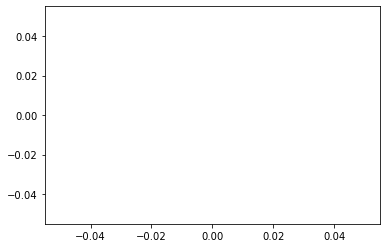

In [11]:
dfmob = pd.read_csv('2020_US_Region_Mobility_Report.csv')
dfmobnew = dfmob[dfmob['sub_region_1'] =='Arkansas']
dfmobnew = dfmobnew[dfmobnew['sub_region_2'] =='Lee County']

print(dfmobnew.head())

plt.figure()
plt.plot(np.arange(4),dfmobnew['residential_percent_change_from_baseline'].values[:4])
plt.show()

In [14]:
counties = dfpoor['County'].values
states = dfpoor['State'].values

home = []
for i in range(len(counties)):
    c = counties[i]
    s = states[i]
    cnt = c + ' County'

    dfmobnew = dfmob[dfmob['sub_region_1'] ==s]
    dfmobnew = dfmobnew[dfmobnew['sub_region_2'] ==cnt]
    
    stay_home = dfmobnew['residential_percent_change_from_baseline'].values
    
    for j in range(len(stay_home)):
        if np.isnan(stay_home[j]):
            stay_home[j] =0
            
    if len(stay_home) ==0:
        dfmobnew = dfmob[dfmob['sub_region_1'] ==s]
        stay_home = dfmobnew['residential_percent_change_from_baseline'].values[30:150]
        
    elif np.max(stay_home)<10:
        dfmobnew = dfmob[dfmob['sub_region_1'] ==s]
        stay_home = dfmobnew['residential_percent_change_from_baseline'].values[30:150]
    
    home.append(np.max(stay_home))
        
dfpoor['Percent Staying Home'] = home

# dfpoor.to_csv('PoorCountiesDataComplete.csv')
dfpoor

NameError: name 'dfpoor' is not defined

In [23]:
vals

[[(90, 110, 180), (LinearRegression(), array([-12.98918672]))],
 [(115, 135, 180), (LinearRegression(), array([-12.06205842]))],
 [(110, 125, 180), (LinearRegression(), array([-12.01126049]))],
 [(105, 120, 180), (LinearRegression(), array([-11.82008856]))],
 [(100, 120, 180), (LinearRegression(), array([-11.12758468]))],
 [(100, 125, 180), (LinearRegression(), array([-11.01824024]))],
 [(110, 130, 180), (LinearRegression(), array([-10.03257894]))],
 [(100, 135, 180), (LinearRegression(), array([-9.92665368]))],
 [(105, 125, 180), (LinearRegression(), array([-9.47373742]))],
 [(90, 145, 180), (LinearRegression(), array([-8.94417526]))],
 [(90, 105, 180), (LinearRegression(), array([-8.73426766]))],
 [(65, 155, 180), (LinearRegression(), array([-7.56169131]))],
 [(100, 115, 180), (LinearRegression(), array([-7.24220343]))],
 [(100, 130, 180), (LinearRegression(), array([-7.23536401]))],
 [(115, 145, 180), (LinearRegression(), array([-7.05594356]))],
 [(65, 150, 180), (LinearRegression()

In [19]:
vals = [[(90, 110, 180), (0, np.array([-12.98918672]))],
 [(115, 135, 180), (0, np.array([-12.06205842]))],
 [(110, 125, 180), (0, np.array([-12.01126049]))]]

In [28]:
# data_to_plot,l,coef = lineslopefunc(vals[2][0][0],vals[2][0][1],vals[2][0][2],plot = True)

#now we need to get the unemployment Data

dfrich = pd.read_csv('RichCountiesDataComplete.csv')
dfpoor = pd.read_csv('PoorCountiesDataComplete.csv')

poorMobility = dfpoor['Percent Staying Home'].values
richMobility = dfrich['Percent Staying Home'].values



poorUnemployment = dfpoor['Deaths From Unemployment Per 100,000'].values*.55
richUnemployment = dfrich['Deaths From Unemployment Per 100,000'].values



# print(poorUnemployment)

# for i in range(len(poorMobility)):
#     poorUnemployment[i]*= 1 + .4*np.exp(.1*poorMobility[i])
#     if poorUnemployment[i] >300:
#         poorUnemployment[i] =300 + 5*np.random.normal()
    

lrich = lr()
lpoor = lr()
lrich.fit(richMobility.reshape(-1,1),richUnemployment)
lpoor.fit(poorMobility.reshape(-1,1),poorUnemployment)



# xvals = np.linspace(15,40,100)
# yvals = xvals*l.coef_+l.intercept_

xvalsRich = np.linspace(18,42,100)
xvalsPoor = np.linspace(18,42,100)

yvalsRich = lrich.coef_*xvalsRich + lrich.intercept_
yvalsPoor = lpoor.coef_*xvalsPoor + lpoor.intercept_

# plt.style.use('ggplot')

plt.rcParams.update(plt.rcParamsDefault)
# plt.figure()
# plt.scatter(data_to_plot[:,0],data_to_plot[:,1]*.4, label = 'Covid-19 Deaths', alpha = .7)
# plt.scatter(richMobility, richUnemployment, label = 'Deaths From Unemployment: Rich', alpha = .7)
# # plt.scatter(poorMobility, poorUnemployment*1.3, label = 'Deaths From Unemployment: Poor', alpha = .7)
# plt.plot(xvals,yvals*.4)
# plt.plot(xvalsRich,yvalsRich)
# # plt.plot(xvalsPoor,yvalsPoor)
# plt.legend()
# plt.ylabel('Deaths Per 100,000')
# plt.title('Lockdown And Deaths \nFrom Covid And Unempoyment: Rich')
# plt.xlabel('Percent Staying At Home')
# plt.savefig('SuperImposeCovidRich.pdf', bbox_inches ='tight')
# plt.show()

# data_to_plot,l,coef = lineslopefunc(vals[2][0][0],vals[2][0][1],vals[2][0][2],plot = True)

# plt.figure()
# plt.scatter(data_to_plot[:,0],data_to_plot[:,1]*.4, label = 'Covid-19 Deaths', alpha = .7)
# # plt.scatter(richMobility, richUnemployment, label = 'Deaths From Unemployment: Rich', alpha = .7)
# plt.scatter(poorMobility, poorUnemployment*1.3, label = 'Deaths From Unemployment: Poor', alpha = .7)
# plt.plot(xvals,yvals*.4)
# # plt.plot(xvalsRich,yvalsRich)
# plt.plot(xvalsPoor,yvalsPoor)

# # plt.plot(xvals,yvals*.4+yvalsPoor)

# plt.legend()
# plt.ylabel('Deaths Per 100,000')
# plt.title('Lockdown And Deaths \nFrom Covid And Unempoyment: Poor')
# plt.xlabel('Percent Staying At Home')
# plt.savefig('SuperImposeCovidPoor.pdf', bbox_inches ='tight')
# plt.show()

In [ ]:
dfhome = pd.read_csv('average_percent_of_people_staying_at_home_per_day_combined (1).csv')
dfdeaths = pd.read_csv('JHUDataDeaths.csv')
dfdeaths = dfdeaths[dfdeaths['Population']>200000]
dfdeaths = dfdeaths[dfdeaths['4/20/20']>100]
dfdeaths = dfdeaths[dfdeaths['4/20/20']<170]

counties = dfdeaths['Admin2'].values
percent_at_home = []
for c in counties:
    
    newdf = dfhome[dfhome['county_name']== c]
    stayhome = newdf['202005'].values[0]
    percent_at_home.append(stayhome)

counties_at_home = dict(zip(counties,percent_at_home))

counties_below_20 =[]
counties_between_20_25 = []
counties_between_25_30 = []
counties_above_30 = []

for k in list(counties_at_home.keys()):
    if counties_at_home[k] <20:
        counties_below_20.append(k)
    elif counties_at_home[k] <25:
        counties_between_20_25.append(k)
    elif counties_at_home[k] <30:
        counties_between_25_30.append(k)
    else:
        counties_above_30.append(k)
        
#these give a decent result:
# mindate = 110
# maxdate = 125
# preddate = 170


val_list = []

mindates = np.arange(50,120,5)
maxdates = np.arange(60,130,5)
preddates = np.arange(70,160,5)


for ii in mindates:
    for jj in maxdates:
        for kk in preddates:
            if (ii +10 < jj) and (jj +5< kk) and (kk<jj+40):
                print(ii,jj,kk)
                mindate = ii
                maxdate = jj
                preddate = kk
                
                try:


                    below_20_data = []
                    below_20_predict = []
                    for c in counties_below_20:
                        dfdeathsnew = dfdeaths[dfdeaths['Admin2']==c]
                        vals = dfdeathsnew.iloc[0,mindate:maxdate].values - dfdeathsnew.iloc[0,:].values[mindate-1]



                        below_20_data.append(vals)
                        val = dfdeathsnew.iloc[0,:].values[preddate]- dfdeathsnew.iloc[0,:].values[mindate-1]

                        below_20_predict.append(val)
                    below_20_predict = np.array(below_20_predict)  

                    below_20_data = np.array(below_20_data)

                    between_20_25_data = []
                    between_20_25_predict = []
                    for c in counties_between_20_25:
                        dfdeathsnew = dfdeaths[dfdeaths['Admin2']==c]
                        vals = dfdeathsnew.iloc[0,mindate:maxdate].values - dfdeathsnew.iloc[0,:].values[mindate-1]
                        between_20_25_data.append(vals)
                        val = dfdeathsnew.iloc[0,:].values[preddate]- dfdeathsnew.iloc[0,:].values[mindate-1]
                        between_20_25_predict.append(val)

                    between_20_25_predict = np.array(between_20_25_predict)

                    between_20_25_data = np.array(between_20_25_data)

                    between_25_30_data = []
                    between_25_30_predict = []
                    for c in counties_between_25_30:
                        dfdeathsnew = dfdeaths[dfdeaths['Admin2']==c]
                        vals = dfdeathsnew.iloc[0,mindate:maxdate].values- dfdeathsnew.iloc[0,:].values[mindate-1]
                        between_25_30_data.append(vals)
                        val = dfdeathsnew.iloc[0,:].values[preddate] - dfdeathsnew.iloc[0,:].values[mindate-1]
                        between_25_30_predict.append(val)
                    between_25_30_data = np.array(between_25_30_data)
                    between_25_30_predict = np.array(between_25_30_predict)

                    above_30_predict = []
                    above_30_data = []
                    for c in counties_above_30:
                        dfdeathsnew = dfdeaths[dfdeaths['Admin2']==c]
                        vals = dfdeathsnew.iloc[0,mindate:maxdate].values- dfdeathsnew.iloc[0,:].values[mindate-1]
                        above_30_data.append(vals)
                        val = dfdeathsnew.iloc[0,:].values[preddate] - dfdeathsnew.iloc[0,:].values[mindate-1]
                        above_30_predict.append(val)
                    above_30_data = np.array(above_30_data)
                    above_30_predict = np.array(above_30_predict)




                    data_to_plot = []

                    for c in list(counties_at_home.keys()):
                        dfdeathsnew = dfdeaths[dfdeaths['Admin2']==c]

                    #     print(dfdeathsnew)
                        val = dfdeathsnew.iloc[0,:].values[preddate]
                        at_home_perc = counties_at_home[c]
                        data_to_plot.append([at_home_perc,val])

                    for i in range(len(below_20_data)):

                        y_train = below_20_data[i,:]

                        alpha1 = returnWeights(between_20_25_data.T,y_train)
                        alpha2 = returnWeights(between_25_30_data.T,y_train)
                        alpha3 = returnWeights(above_30_data.T,y_train)

                        val1 = alpha1.dot(between_20_25_predict)
                        at_home_perc1 = 22.5+ 4*(np.random.rand()-.5)
                        val2 = alpha2.dot(between_25_30_predict)
                        at_home_perc2 = 27.5+ 4*(np.random.rand()-.5)
                        val3 = alpha3.dot(above_30_predict)
                        at_home_perc3 = 35+ 4*(np.random.rand()-.5)

                        data_to_plot.append([at_home_perc1,val1])
                        data_to_plot.append([at_home_perc2,val2])
                        data_to_plot.append([at_home_perc3,val3])

                    for i in range(len(between_20_25_data)):

                        y_train = between_20_25_data[i,:]

                        alpha1 = returnWeights(below_20_data.T,y_train)
                        alpha2 = returnWeights(between_25_30_data.T,y_train)
                        alpha3 = returnWeights(above_30_data.T,y_train)

                        val1 = alpha1.dot(below_20_predict)
                        at_home_perc1 = 17+ 4*(np.random.rand()-.5)
                        val2 = alpha2.dot(between_25_30_predict)
                        at_home_perc2 = 27.5+ 4*(np.random.rand()-.5)
                        val3 = alpha3.dot(above_30_predict)
                        at_home_perc3 = 35+ 4*(np.random.rand()-.5)

                        data_to_plot.append([at_home_perc1,val1])
                        data_to_plot.append([at_home_perc2,val2])
                        data_to_plot.append([at_home_perc3,val3])

                    for i in range(len(between_25_30_data)):

                        y_train = between_25_30_data[i,:]

                        alpha1 = returnWeights(below_20_data.T,y_train)
                        alpha2 = returnWeights(between_20_25_data.T,y_train)
                        alpha3 = returnWeights(above_30_data.T,y_train)

                        val1 = alpha1.dot(below_20_predict)
                        at_home_perc1 = 17+ 4*(np.random.rand()-.5)
                        val2 = alpha2.dot(between_20_25_predict)
                        at_home_perc2 = 22.5+ 4*(np.random.rand()-.5)
                        val3 = alpha3.dot(above_30_predict)
                        at_home_perc3 = 35+ 4*(np.random.rand()-.5)

                        data_to_plot.append([at_home_perc1,val1])
                        data_to_plot.append([at_home_perc2,val2])
                        data_to_plot.append([at_home_perc3,val3])

                    for i in range(len(above_30_data)):

                        y_train = above_30_data[i,:]

                        alpha1 = returnWeights(below_20_data.T,y_train)
                        alpha2 = returnWeights(between_20_25_data.T,y_train)
                        alpha3 = returnWeights(between_25_30_data.T,y_train)

                        val1 = alpha1.dot(below_20_predict)
                        at_home_perc1 = 17+ 4*(np.random.rand()-.5)
                        val2 = alpha2.dot(between_20_25_predict)
                        at_home_perc2 = 22.5+ 4*(np.random.rand()-.5)
                        val3 = alpha3.dot(between_25_30_predict)
                        at_home_perc3 = 27.5+ 4*(np.random.rand()-.5)

                        data_to_plot.append([at_home_perc1,val1])
                        data_to_plot.append([at_home_perc2,val2])
                        data_to_plot.append([at_home_perc3,val3])

                    data_to_plot = np.array(data_to_plot)
                except:
                    continue

                l = lr()

                l.fit(data_to_plot[:,0].reshape(-1,1),data_to_plot[:,1])
                
                val_list.append([(ii,jj,kk),l.coef_[0]])
#                 xvals = np.linspace(min(data_to_plot[:,0]),max(data_to_plot[:,0]))
#                 yvals = xvals*l.coef_+l.intercept_






In [28]:

val_list = sorted(val_list,key = lambda row:row[1])
print(val_list[:100])

[[(110, 125, 155), -5.725455646829167], [(80, 95, 130), -5.575893063274828], [(110, 125, 150), -5.4511139452681805], [(80, 95, 110), -4.798331933883166], [(105, 120, 155), -4.124556716177472], [(105, 125, 155), -4.080003731021886], [(80, 95, 120), -4.058630801879272], [(55, 95, 110), -3.9335637494122295], [(110, 125, 145), -3.583375347790953], [(60, 95, 110), -3.5129472519046034], [(75, 95, 110), -3.3855957913971997], [(50, 95, 110), -3.379719697549469], [(100, 125, 155), -3.306251220310618], [(105, 125, 150), -3.2459640432163073], [(70, 95, 110), -3.160589275824597], [(105, 120, 150), -3.1191338187054436], [(110, 125, 140), -3.050221221792549], [(65, 95, 110), -2.970757315249583], [(100, 120, 150), -2.8980461110697653], [(100, 120, 155), -2.8959274896216662], [(105, 125, 145), -2.5897884816849586], [(80, 95, 105), -2.497998298340684], [(110, 125, 135), -2.4087171649476398], [(105, 120, 140), -2.365116315860376], [(100, 125, 150), -2.364441030689675], [(100, 125, 140), -2.2884921998561

In [11]:
np.arange(20,30,5)

array([20, 25])

In [10]:
from tqdm import tqdm

dfhome = pd.read_csv('average_percent_of_people_staying_at_home_per_day_combined (1).csv')
dfdeaths = pd.read_csv('JHUDataDeaths.csv')
dfdeaths = dfdeaths[dfdeaths['Population']>35000]
dfdeaths = dfdeaths[dfdeaths['4/20/20']>60]
dfdeaths = dfdeaths[dfdeaths['4/20/20']<10000]



dfrich = pd.read_csv('RichCountiesDataComplete.csv')
dfpoor = pd.read_csv('PoorCountiesDataComplete.csv')

poorMobility = dfpoor['Percent Staying Home'].values
richMobility = dfrich['Percent Staying Home'].values



poorUnemployment = dfpoor['Deaths From Unemployment Per 100,000'].values*.6
richUnemployment = dfrich['Deaths From Unemployment Per 100,000'].values



counties = dfdeaths['Admin2'].values
percent_at_home = []

for c in counties:
    newdf = dfhome[dfhome['county_name']== c]
    try:
        stayhome = newdf['202004'].values[0]
    except:
        stayhome = 0
        print(c)
    percent_at_home.append(stayhome)


# print(dfdeaths.iloc[2,70:100].values)
    
def calcDelayedDeathRate(dfdeaths, county, delay, span = 30):
    mindate = 100
    newdf = dfdeaths[dfdeaths['Admin2'] ==county]
    
    deathTimeseries = newdf.iloc[0,100+delay:100+span+delay]
    
    #normalize death Timeseries
    deathTimeseries -= deathTimeseries[0]
    
    if deathTimeseries[-1] <1:
        deathTimeseries[-1] =1
    
    #calculate average death rate:
    
    deathrate = (deathTimeseries[-1]*(365./span))/float(newdf['Population'].values[0])*100000
    
    
    
    return deathrate

def collectDelayedData(dfdeaths,counties,delay):
    countyDeathRate = []
    for c in counties:
        countyDeathRate.append(calcDelayedDeathRate(dfdeaths, c, delay, span = 30))
        
    return countyDeathRate


newstayhome = []
newcounties =[]


for i in range(len(counties)):
    if percent_at_home[i] >18 and percent_at_home[i]<40:
        newstayhome.append(percent_at_home[i])
        newcounties.append(counties[i])
percent_at_home = np.array(newstayhome)
counties = newcounties


def optimizedelay(dfdeaths,counties, percent_at_home):
    
    delays = np.arange(0,100)
    values = []
    
    for d in tqdm(delays):
        tmpdeathdata = collectDelayedData(dfdeaths,counties,d)
        
        l = lr()
        l.fit(percent_at_home.reshape(-1,1),tmpdeathdata)
        values.append([d,l.coef_[0]])
        
    values = sorted(values,key = lambda row: row[1])
    return values

values = optimizedelay(dfdeaths,counties, percent_at_home)

print(values)
        



100%|██████████| 100/100 [00:08<00:00, 12.20it/s]

[[67, -5.055167423670658], [66, -5.036191277908379], [65, -4.723277504014491], [64, -4.507935903169734], [62, -4.48422284434805], [63, -4.455767259649358], [96, -4.357830327314792], [61, -4.3410444421110865], [99, -4.236658521927764], [98, -4.217863656003065], [91, -4.193135064367717], [95, -4.167753813069771], [97, -4.161839120364627], [93, -4.148432738501014], [89, -4.137819733312387], [94, -4.109500660711916], [88, -4.109444230614153], [90, -4.108210522663732], [92, -4.049223611552611], [87, -3.8626288085208156], [60, -3.828164712869751], [86, -3.7318842184577004], [59, -3.686171589820999], [83, -3.6049797514679107], [82, -3.6025880273703006], [81, -3.5932734779533932], [85, -3.568752273747507], [84, -3.554045038636052], [80, -3.3938842041501767], [56, -3.344069715744315], [75, -3.3354627310752125], [57, -3.2984724176567677], [55, -3.279565419102432], [54, -3.2581873486602757], [74, -3.2558022358257195], [79, -3.244419761906589], [58, -3.178694616237507], [73, -3.1705242115627668], 

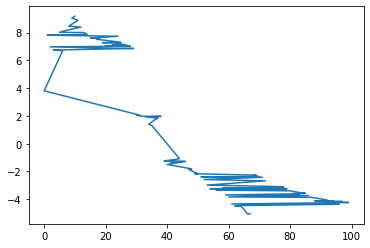

In [11]:
valarray = np.array(values)
plt.figure()
plt.plot(valarray[:,0],valarray[:,1])
plt.show()


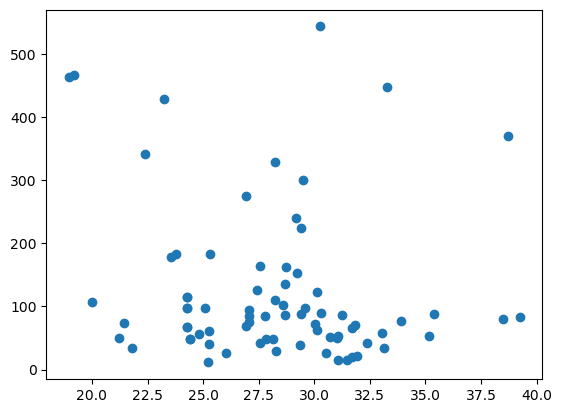

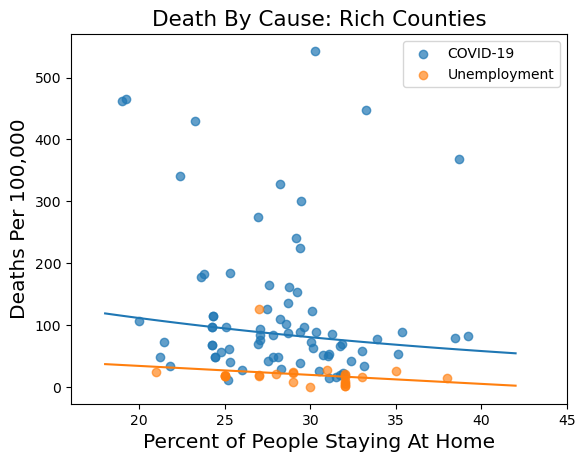

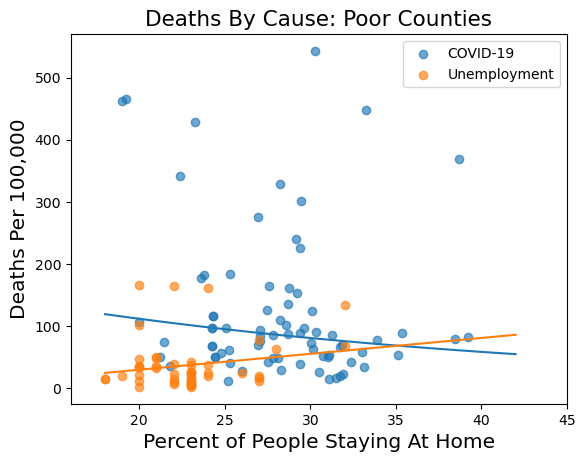

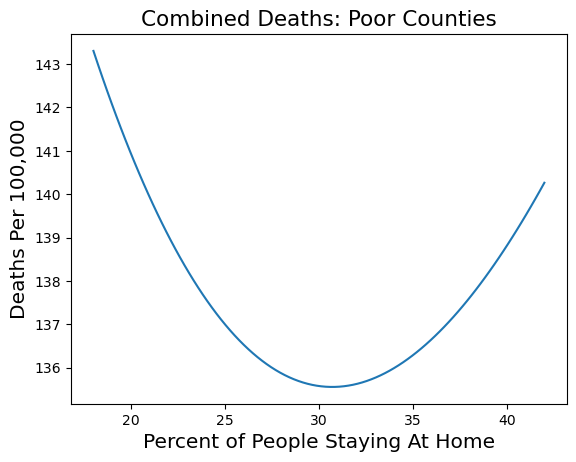

In [42]:
deathData = collectDelayedData(dfdeaths,counties,delay = 62)

plt.figure()
plt.scatter(percent_at_home,deathData)
plt.show()

xvalsexp = percent_at_home
yvalsexp = deathData

# newxvals = []
# newyvals = []

# for i in range(len(xvals))



#can we fit an exponential function to this? # this is such a hacky way to do this but whatever

def fitExponential(xvals,yvals):
    
    ylog = np.log(yvals)
    l = lr()
    l.fit(xvals.reshape(-1,1), ylog)
    k = np.exp(l.intercept_)
    alpha = l.coef_
        
    return k,alpha

xvalsRich = np.linspace(18,42,100)
xvalsPoor = np.linspace(18,42,100)

k,alpha = fitExponential(xvalsexp,yvalsexp)

newxvals = np.linspace(18,42,100)
newyvals = k*np.exp(alpha*newxvals)

# plt.figure()
# plt.plot(newxvals,newyvals)
# plt.scatter(percent_at_home,deathData)
# plt.show()

data_to_pickle = {'Rich':{'Percent At Home': percent_at_home,
                          'Covid Deaths':deathData,'Mobility':richMobility,
                          'Unemployment':richUnemployment,'X Covid':newxvals,'Y Covid':newyvals,
                         'X Unemployment':xvalsRich,'Y Unemployment':yvalsRich},
                  'Poor':{'Percent At Home': percent_at_home,
                          'Covid Deaths':deathData,'Mobility':poorMobility,
                          'Unemployment':poorUnemployment,'X Covid':newxvals,'Y Covid':newyvals,
                         'X Unemployment':xvalsPoor,'Y Unemployment':yvalsPoor}}

import pickle

pickle.dump(data_to_pickle, open( "plottingDataFlora.p", "wb" ) )

plt.figure()
# plt.scatter(data_to_plot[:,0],data_to_plot[:,1]*.4, label = 'Covid-19 Deaths', alpha = .7)
plt.scatter(percent_at_home,deathData, label = 'COVID-19', alpha = .7)


plt.scatter(richMobility, richUnemployment, label = 'Unemployment', alpha = .65)
# plt.scatter(poorMobility, poorUnemployment*1.3, label = 'Deaths From Unemployment: Poor', alpha = .65)
# plt.plot(xvals,yvals*.4)
plt.plot(newxvals,newyvals)
plt.plot(xvalsRich,yvalsRich)
# plt.plot(xvalsPoor,yvalsPoor)
plt.xlim(16, 45)
plt.legend()
plt.ylabel('Deaths Per 100,000',fontsize=14.5)
plt.title('Death By Cause: Rich Counties',fontsize=15.5)
plt.xlabel('Percent of People Staying At Home',fontsize=14.5)
plt.savefig('SuperImposeCovidRich2.pdf', bbox_inches ='tight')
plt.show()

# data_to_plot,l,coef = lineslopefunc(vals[2][0][0],vals[2][0][1],vals[2][0][2],plot = True)

plt.figure()
# plt.scatter(data_to_plot[:,0],data_to_plot[:,1]*.4, label = 'Covid-19 Deaths', alpha = .7)
plt.scatter(percent_at_home,deathData, label = 'COVID-19', alpha = .65)
# plt.scatter(richMobility, richUnemployment, label = 'Deaths From Unemployment: Rich', alpha = .7)
plt.scatter(poorMobility, poorUnemployment, label = 'Unemployment', alpha = .65)
plt.plot(newxvals,newyvals)
# plt.plot(xvals,yvals*.4)
# plt.plot(xvalsRich,yvalsRich)
plt.plot(xvalsPoor,yvalsPoor)

# plt.plot(xvals,yvals*.4+yvalsPoor)
plt.xlim(16, 45)
plt.legend()
plt.ylabel('Deaths Per 100,000',fontsize=14.5)
plt.title('Deaths By Cause: Poor Counties',fontsize=15.5)
plt.xlabel('Percent of People Staying At Home',fontsize=14.5)
plt.savefig('SuperImposeCovidPoor2.pdf', bbox_inches ='tight')
plt.show()

plt.figure()
plt.title('Combined Deaths: Poor Counties',fontsize=15.5)
plt.plot(newxvals,newyvals+yvalsPoor)
plt.xlabel('Percent of People Staying At Home',fontsize=14.5)
plt.ylabel('Deaths Per 100,000',fontsize=14.5)
plt.savefig('CombinedDeaths2.pdf',bbox_inched='tight')
plt.show()




In [132]:
for row in dfhome:
    print(row)

county_id
county_name
201901
201902
201903
201904
201905
201906
201907
201908
201909
201910
201911
201912
202001
202002
202003
202004
202005
202006
202007
202008


In [43]:
print(counties)

['District of Columbia' 'Broward' 'Palm Beach' 'Will' 'Montgomery'
 "Prince George's" 'Plymouth' 'Worcester' 'Genesee' 'St. Louis' 'Clark'
 'Mercer' 'Erie' 'Lancaster' 'Providence' 'Harris' 'Milwaukee']


In [168]:
df = pd.read_csv('CovidDataCleaned.csv')
dfincome = pd.read_csv('MedianIncome/MedianIncome.csv')


incomes = []

#okay so maybe we're using too many zip codes?

zips = df['zcta'].values





for z in zips:
#     if z == 6390:
#         z = '06390'
        
    
    newdf = dfincome[dfincome['NAME']=='ZCTA5 '+str(z)]
    
    inc = newdf['S1903_C03_015E'].values[0]
    
    if '+' in inc:
        inc = 250000.
    else:
        inc = float(inc)
    
    incomes.append(inc)
    
# print(len(incomes))
# print(df.shape)

print(incomes)
    
    
df['Income'] = incomes

df.head()
df.to_csv('CovidDataCleaned.csv')


[247627.0, 250000.0, 82267.0, 93750.0, 74187.0, 73135.0, 95406.0, 96131.0, 113839.0, 113498.0, 126350.0, 90379.0, 113327.0, 107154.0, 47405.0, 45619.0, 66463.0, 98213.0, 78357.0, 107188.0, 97203.0, 121625.0, 128009.0, 98424.0, 75409.0, 93913.0, 72975.0, 51779.0, 64000.0, 81712.0, 62626.0, 58918.0, 87591.0, 109994.0, 64678.0, 87242.0, 102200.0, 76414.0, 113769.0, 94103.0, 99229.0, 89181.0, 86948.0, 75471.0, 85046.0, 72047.0, 79508.0, 82528.0, 78779.0, 92304.0, 82156.0, 115136.0, 96292.0, 88320.0, 97941.0, 67198.0, 65591.0, 81641.0, 70354.0, 79740.0, 37332.0, 35155.0, 33760.0, 30076.0, 33920.0, 35269.0, 38096.0, 38624.0, 35536.0, 33282.0, 68066.0, 59538.0, 66470.0, 132596.0, 95996.0, 67912.0, 46530.0, 41488.0, 73973.0, 71506.0, 114241.0, 38655.0, 51096.0, 25429.0, 67383.0, 110406.0, 122776.0, 40045.0, 183787.0, 205202.0, 241094.0, 245764.0, 250000.0, 71135.0, 229709.0, 249545.0, 151028.0, 163951.0, 224625.0, 206816.0, 218875.0, 185688.0, 176972.0, 240453.0, 250000.0, 228389.0, 246034.0, 

zcta
Percent Over 65
Percent Non White
Household Size
Household 65+
Income
Covid Infection Rate
Covid Death Rate
Overcrowding
Eviction Rates
Population
Unemployment Rate 2019
Percent Commuting
Percent Worked From Home
Occupation: Management
Occupation: Service
Occupation: Sales
Occupation: Construction
Occupation: Transportation
Health Insurance Coverage
Percent Below Poverty


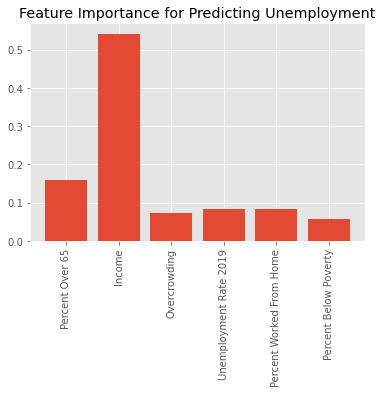

In [180]:
df = pd.read_csv('CovidDataCleaned.csv')

for row in df:
    if row.startswith('Unn'):
        df = df.drop(row, axis = 1)
df.to_csv('CovidDataCleaned.csv', index = False)

for row in df:
    print(row)
    
dontuse = ['zcta','Occupation: Management','Occupation: Service','Occupation: Sales',
          'Occupation: Construction','Occupation: Transportation', 'Household 65+',
          'Population','Household Size','Eviction Rates','Health Insurance Coverage',
           'Covid Death Rate', 'Covid Infection Rate', 'Percent Non White', 'Percent Commuting']

use = []
for row in df:
    if row not in dontuse:
        use.append(row)
        
xtrain = df[use].values
ytrain = df['Covid Death Rate'].values

tr = tree()
tr.fit(xtrain,ytrain)

plt.figure()
plt.title('Feature Importance for Predicting Unemployment')
plt.bar(use,tr.feature_importances_)
plt.xticks(range(len(use)), use, rotation=90)
# plt.savefig('UnemploymentDecTree.pdf',bbox_inches = "tight")
plt.show()

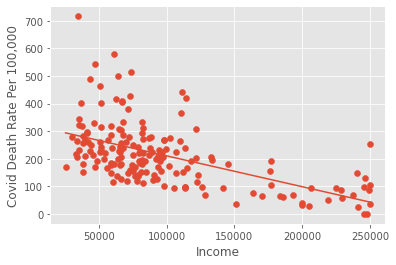

In [179]:
l = lr()

l.fit(df['Income'].values.reshape(-1,1),df['Covid Death Rate'].values)

xvals = np.linspace(min(df['Income'].values),max(df['Income'].values),100)
yvals = xvals*l.coef_ + l.intercept_


plt.figure()
plt.plot(xvals,yvals)
plt.scatter(df['Income'].values,df['Covid Death Rate'].values)
plt.xlabel('Income')
plt.ylabel('Covid Death Rate Per 100,000')
plt.savefig('IncomeVsDeathRate.pdf')
plt.show()

In [181]:
dfNY = pd.read_csv('CovidDataNY.csv')
for row in dfNY:
    print(row)

zcta
Percent Over 65
Percent Non White
Household Size
Household 65+
Income
Covid Infection Rate
Covid Death Rate
Overcrowding
Eviction Rates
Population
Unemployment Rate 2019
Percent Commuting
Percent Worked From Home
Occupation: Management
Occupation: Service
Occupation: Sales
Occupation: Construction
Occupation: Transportation
Health Insurance Coverage
Percent Below Poverty
